<a href="https://colab.research.google.com/github/AD20SH05/aps-lab/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Original List: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sorted List: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
Input Size: 1000 → Time: 0.000368 seconds
Input Size: 2000 → Time: 0.000402 seconds
Input Size: 5000 → Time: 0.000755 seconds
Input Size: 10000 → Time: 0.001089 seconds
Input Size: 20000 → Time: 0.002068 seconds
Input Size: 50000 → Time: 0.003824 seconds


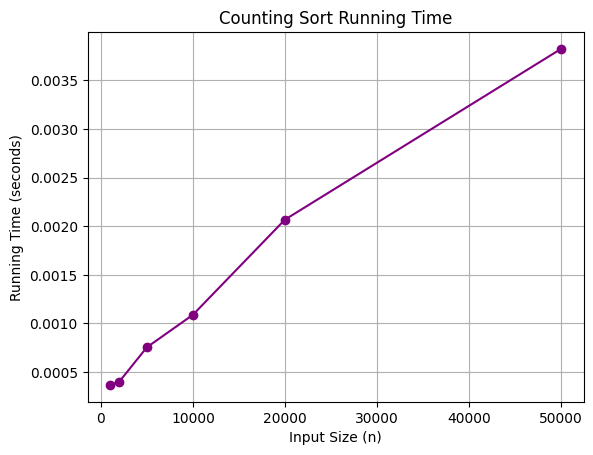

In [1]:
#write code for above cell and compute the running time and also plot graph.
import time
import matplotlib.pyplot as plt
import random

# Counting Sort Implementation
def counting_sort(arr, max_val):
    # Step 1: Create buckets (counters)
    count = [0] * (max_val + 1)

    # Step 2: Count occurrences
    for num in arr:
        count[num] += 1

    # Step 3: Fill sorted array
    sorted_arr = []
    for i in range(len(count)):
        sorted_arr.extend([i] * count[i])

    return sorted_arr

# Example run with sample input
numbers = [4,3,2,1,4,3,2,4,3,4]
print("Original List:", numbers)
sorted_list = counting_sort(numbers, max(numbers))
print("Sorted List:", sorted_list)

# Benchmarking with larger inputs
n_list = [1000, 2000, 5000, 10000, 20000, 50000]
times = []

for n in n_list:
    test_list = [random.randint(0, 1000) for _ in range(n)]  # values range 0–1000
    start = time.time()
    counting_sort(test_list, max(test_list))
    end = time.time()
    times.append(end - start)
    print(f"Input Size: {n} → Time: {end - start:.6f} seconds")

# Plot graph
plt.plot(n_list, times, marker='o', color='purple')
plt.xlabel("Input Size (n)")
plt.ylabel("Running Time (seconds)")
plt.title("Counting Sort Running Time")
plt.grid(True)
plt.show()


 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Original List: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sorted List: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
Input Size: 1000 → Time: 0.001424 seconds
Input Size: 2000 → Time: 0.001254 seconds
Input Size: 5000 → Time: 0.004065 seconds
Input Size: 10000 → Time: 0.006652 seconds
Input Size: 20000 → Time: 0.015282 seconds
Input Size: 50000 → Time: 0.095888 seconds


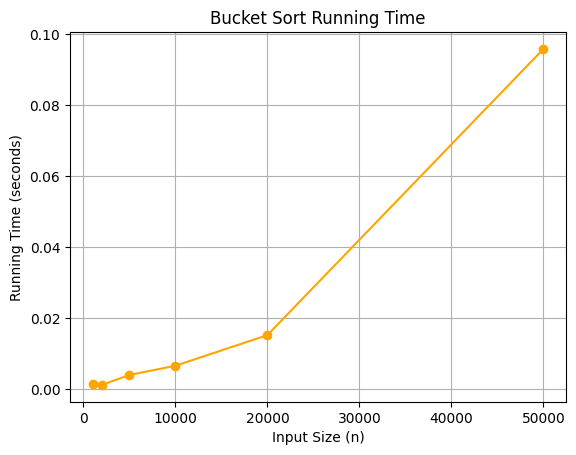

In [2]:
#write code for above cell and compute the running time and also plot graph.
import time
import matplotlib.pyplot as plt
import random

# Bucket Sort Implementation
def bucket_sort(arr):
    if len(arr) == 0:
        return arr

    # Step 1: Find min and max values
    min_val, max_val = min(arr), max(arr)
    bucket_count = len(arr)

    # Step 2: Create buckets
    buckets = [[] for _ in range(bucket_count)]

    # Step 3: Distribute elements into buckets
    for num in arr:
        index = int((num - min_val) / (max_val - min_val + 1) * (bucket_count - 1))
        buckets[index].append(num)

    # Step 4: Sort each bucket and concatenate
    sorted_arr = []
    for bucket in buckets:
        sorted_arr.extend(sorted(bucket))

    return sorted_arr

# Example run with sample input
numbers = [8,5,3,1,9,6,0,7,4,2,5]
print("Original List:", numbers)
sorted_list = bucket_sort(numbers)
print("Sorted List:", sorted_list)

# Benchmarking with larger inputs
n_list = [1000, 2000, 5000, 10000, 20000, 50000]
times = []

for n in n_list:
    test_list = [random.randint(0, 1000) for _ in range(n)]  # values range 0–1000
    start = time.time()
    bucket_sort(test_list)
    end = time.time()
    times.append(end - start)
    print(f"Input Size: {n} → Time: {end - start:.6f} seconds")

# Plot graph
plt.plot(n_list, times, marker='o', color='orange')
plt.xlabel("Input Size (n)")
plt.ylabel("Running Time (seconds)")
plt.title("Bucket Sort Running Time")
plt.grid(True)
plt.show()


**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Original List: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sorted List: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]
Input Size: 1000 → Time: 0.001642 seconds
Input Size: 2000 → Time: 0.003217 seconds
Input Size: 5000 → Time: 0.009228 seconds
Input Size: 10000 → Time: 0.019294 seconds
Input Size: 20000 → Time: 0.043481 seconds
Input Size: 50000 → Time: 0.148313 seconds


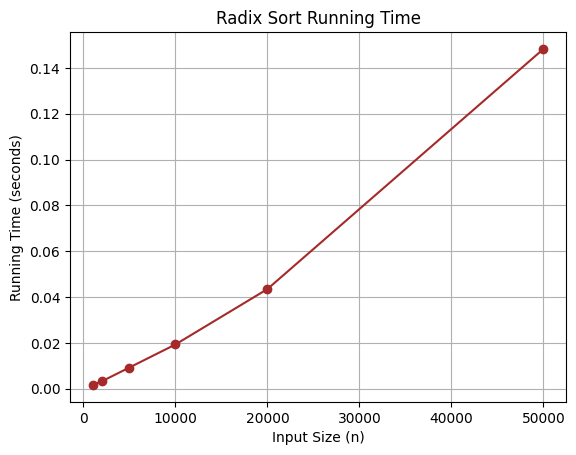

In [3]:
#write code for above cell and compute the running time and also plot graph.
import time
import matplotlib.pyplot as plt
import random

# Counting sort used as a subroutine for Radix Sort
def counting_sort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10  # digits 0–9

    # Count occurrences of digits
    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1

    # Update count[i] so it contains actual position of digit in output
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build output array
    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1

    # Copy output back to arr
    for i in range(n):
        arr[i] = output[i]

# Radix Sort Implementation
def radix_sort(arr):
    if len(arr) == 0:
        return arr
    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10
    return arr

# Example run with sample input
numbers = [18,5,100,3,1,19,6,0,7,4,2]
print("Original List:", numbers)
sorted_list = radix_sort(numbers)
print("Sorted List:", sorted_list)

# Benchmarking with larger inputs
n_list = [1000, 2000, 5000, 10000, 20000, 50000]
times = []

for n in n_list:
    test_list = [random.randint(0, 100000) for _ in range(n)]  # values range 0–100000
    start = time.time()
    radix_sort(test_list)
    end = time.time()
    times.append(end - start)
    print(f"Input Size: {n} → Time: {end - start:.6f} seconds")

# Plot graph
plt.plot(n_list, times, marker='o', color='brown')
plt.xlabel("Input Size (n)")
plt.ylabel("Running Time (seconds)")
plt.title("Radix Sort Running Time")
plt.grid(True)
plt.show()
